In [1]:
#Ridge Regression
 # Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. 
    # This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, 
   # and variances are large,this results in predicted values being far away from the actual values.

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict

In [9]:
data = pd.read_csv("C:/Users/Derya/Downloads/Team_Basketball.csv")
df = data.copy()
df = df.dropna()
ms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float")
X = pd.concat([X_, ms[["League_N","Division_W","NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [10]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)

In [11]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [17]:
lambdas = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()

coefficients = []

for i in lambdas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    coefficients.append(ridge_model.coef_)

In [18]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ridge Coefficient ')

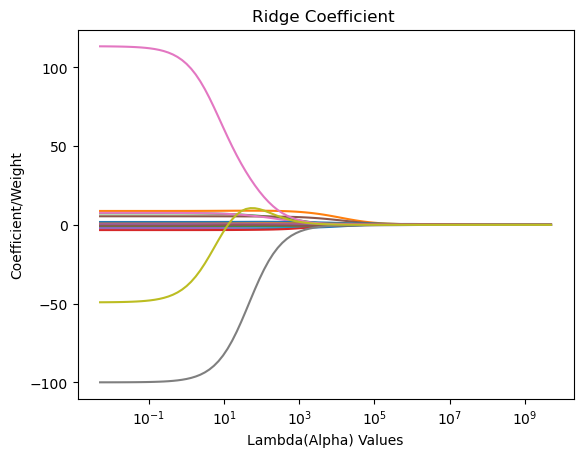

In [19]:
ax = plt.gca()
ax.plot(lambdas, coefficients)
ax.set_xscale("log")

plt.xlabel("Lambda(Alpha) Values")
plt.ylabel("Coefficient/Weight")
plt.title("Ridge Coefficient ")

In [25]:
# Prediction
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
y_predict = ridge_model.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test,y_predict))

357.0517922282843

In [29]:
rmse = np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train)))

In [30]:
rmse

289.3292830531484

In [31]:
# Model Tuning

In [32]:
lambdas[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [33]:
from sklearn.linear_model import RidgeCV

In [38]:
ridge_cv = RidgeCV(alphas = lambdas, scoring="neg_mean_squared_error")

In [37]:
?RidgeCV

In [39]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [40]:
ridge_cv.alpha_

2018508.6292982749

In [42]:
ridge_tuned = Ridge(alpha=ridge_cv.alpha_).fit(X_train,y_train)

In [43]:
ridge_tuned

Ridge(alpha=2018508.6292982749)

In [46]:
np.sqrt(mean_squared_error(y_test,ridge_tuned.predict(X_test)))

387.66724377389795